In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib import colors
from matplotlib.colors import LightSource
import pandas as pd
%matplotlib inline

In [9]:
def read_data():
    
    file_path = f'data_out/backup/feb20_S8_t_corrected.csv'
    
    usecols = ['y', 'x', 'frame', 'particle']
    
    data = pd.read_csv(file_path, usecols=usecols)
    
    
    return data

In [3]:
def common_particles(frame1, frame2):
    
    df1 = pd.DataFrame(columns=['particle', 'x', 'y'])
    df2 = pd.DataFrame(columns=['particle', 'x', 'y'])
    
    i = -1
    for part in frame1['particle']:
        
        if (part in frame2['particle'].unique()):
            mask1 = frame1['particle'] == part
            x1 = frame1[mask1]['x'].item()
            y1 = frame1[mask1]['y'].item()

            mask2 = frame2['particle'] == part
            x2 = frame2[mask2]['x'].item()
            y2 = frame2[mask2]['y'].item()

            i += 1
            df1.loc[i] = [int(part), x1, y1]
            df2.loc[i] = [int(part), x2, y2]
    
    
    return df1, df2

In [4]:
def draw_ball(x, y, radius=0.05, base_color='blue'):
    """
    Draws a ball at the given (x, y) coordinate.
    
    Parameters:
    x (float): The x-coordinate of the ball's center.
    y (float): The y-coordinate of the ball's center.
    radius (float): The radius of the ball.
    color (str): The color of the ball.
    """
    
    # Draw the ball (circle)
    ball = plt.Circle((x, y), radius, color=base_color)
    ax.add_patch(ball)
    

In [5]:
def create_sphere(x, y, z, radius, resolution=50):
    """
    Generate the x, y, z coordinates of points on a sphere surface.

    :param center: tuple (x_center, y_center, z_center) specifying the center of the sphere
    :param radius: radius of the sphere
    :param resolution: resolution of the meshgrid for sphere (number of divisions along theta and phi)
    :return: x, y, z coordinates of the sphere's surface
    """
    
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    
#     for (xi, yi, zi) in zip(x, y, z):
    xs = x + radius * np.outer(np.cos(u), np.sin(v))
    ys = y + radius * np.outer(np.sin(u), np.sin(v))
    zs = z + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    
    return xs, ys, zs

In [6]:
def draw_ball_3D(x, y, radius=15, base_color="blue"):
    
    z = np.zeros_like(x)
    

    # Define number of layers to simulate filled balls
    num_layers = 1 #2
    layer_alpha = np.linspace(1, 1, num_layers)  # Transparency levels
    
    
    for (x_center, y_center, z_center) in zip(x, y, z):
        for i, alpha in enumerate(layer_alpha):
            
            # Generate the sphere coordinates for each layer
            current_radius = radius * (1 - i / num_layers)  # Decrease radius for inner layers
            
            x_sphere, y_sphere, z_sphere = create_sphere(x_center, y_center, z_center, current_radius)
        
            ax.plot_surface(x_sphere, y_sphere, z_sphere, color=(base_color, alpha), rstride=1, cstride=1, 
                           linewidth=0.15, edgecolors='lavenderblush')
            
    
    
    max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0

    mid_x = (x.max()+x.min()) * 0.5
    mid_y = (y.max()+y.min()) * 0.5
    mid_z = (z.max()+z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    
#     return xs_arr, ys_arr#, zs_arr

In [7]:
def draw_arrow(x1, x2, y1, y2):
    
#     for i in range(len(x) - 1):
    x_line = [x1, x2]
    y_line = [y1, y2]
    z_line = 0 #[z[i], z[i + 1]]
    
    
    ax.plot(x_line, y_line, z_line, color='white', linestyle='-', linewidth=2)

In [10]:
%%time


data = read_data()

frame_0 = data[data['frame'] == 0]
frame_1 = data[data['frame'] == 300] #180#450
frame_2 = data[data['frame'] == 600] #1800 #4500
frame_3 = data[data['frame'] == 900]
frame_4 = data[data['frame'] == 1200]
frame_5 = data[data['frame'] == 1500]
frame_6 = data[data['frame'] == 1800]

df0, df1 = common_particles(frame_0, frame_1)
_, df2 = common_particles(frame_0, frame_2)
_, df3 = common_particles(frame_0, frame_3)
_, df4 = common_particles(frame_0, frame_4)
_, df5 = common_particles(frame_0, frame_5)
_, df6 = common_particles(frame_0, frame_6)


print(df0.shape[0])
print(df1.shape[0])
print(df2.shape[0])
print(df3.shape[0])
print(df4.shape[0])
print(df5.shape[0])
print(df6.shape[0])

71
71
61
52
49
42
34
CPU times: user 335 ms, sys: 24.2 ms, total: 360 ms
Wall time: 364 ms


In [9]:
# max_frame = data['frame'].values[-1] + 1
# print(max_frame)

In [11]:
# Find intersection of all DataFrames on the common column 'particle'

def filter_df(*dfs):
    
    common_part = set(dfs[0]['particle'])
    
    for df in dfs[1:]:
        common_part.intersection_update(set(df['particle']))

    # Filter each DataFrame to keep only rows with particles in the common_parts
    filtered_dfs = [df[df['particle'].isin(common_part)] for df in dfs]
    
    
    return filtered_dfs

In [11]:
# filtered_dfs = filter_df(df0, df1, df2)

# print(len(filtered_dfs))
# print(len(filtered_dfs[1]))

# print(filtered_dfs[0].head())

In [12]:
dfs = filter_df(df0, df1, df2, df3, df4, df5, df6)
print(len(dfs[0]))

34


In [13]:
def dr(df1, df2):
    
#     a_s = 0.5#1.28 # micron for S6 sample
#     micron_to_px = 1/0.06905
#     a_s_px = a_s * micron_to_px # 18.53
    
    # Merge dataframes on 'particle' to align rows with the same 'particle'
    df = pd.merge(df1, df2, on='particle', suffixes=('1', '2'))
    
    # Calculate the difference in 'x' values for each particle
    df['dr'] = np.sqrt( (df.x2 - df.x1)**2 + (df.y2 - df.y1)**2 )
    
    
#     df = df[df['dr'] >= a_s_px]
    df_sorted = df.sort_values(by='dr')
    N = len(df)
    N_top = math.ceil(N / 1) #/10 choose 5% of the largest displacement
    
    df_top = df_sorted.tail(N_top)
    
    
    return df_top

In [14]:
df_dr = dr(dfs[0], dfs[4])
# dfs_as = filter_df(df0, df1, df2)
# print(len(dfs[0]))
print(f"N = {len(df_dr)}")
print('-------')
print(f"max = {df_dr['dr'].max()}")
print('-------')
# print(df_dr['dr'])

N = 34
-------
max = 26.100385033299947
-------


In [15]:
dfs_top = filter_df(dfs[0], dfs[1], dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], df_dr)
print(len(dfs_top))

8


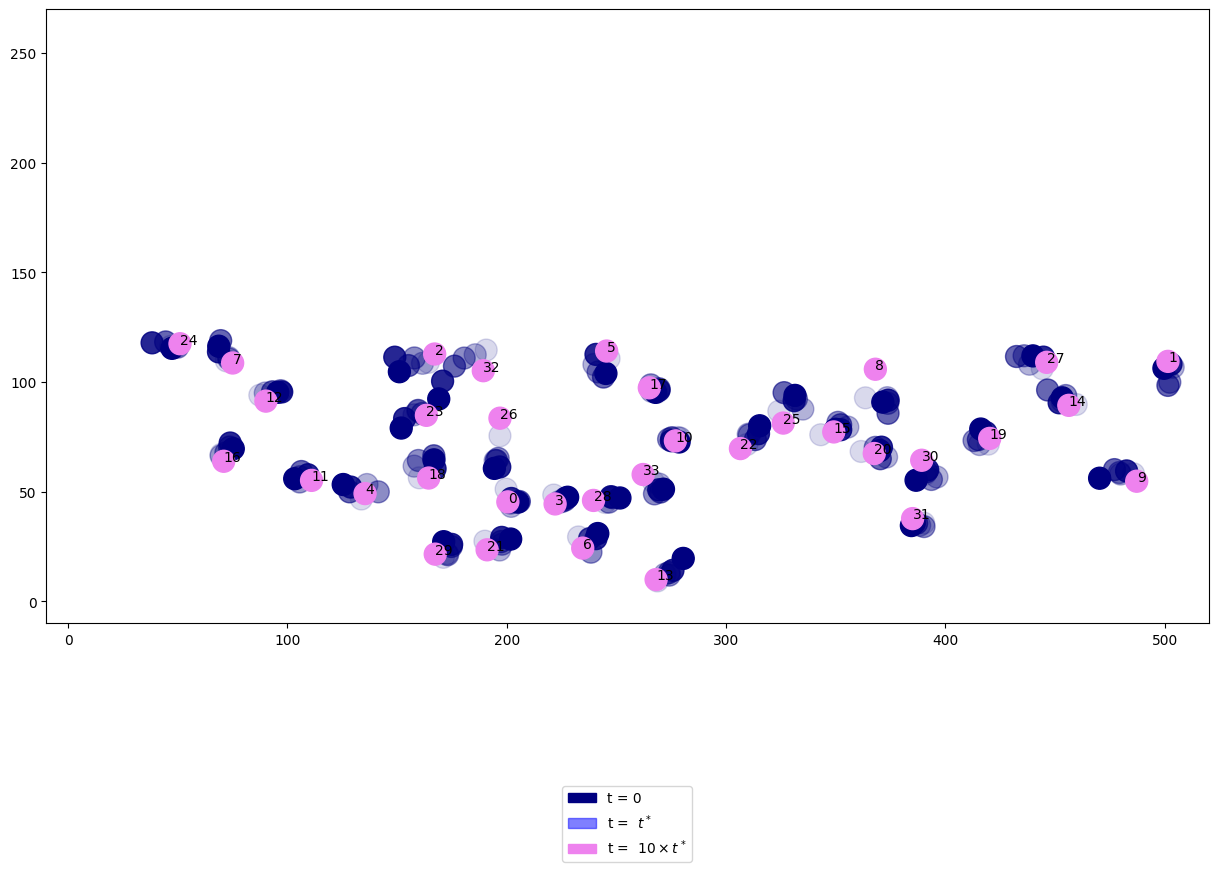

In [16]:
# x_max = 512 # px
# y_max = 128


x0 = dfs_top[0].x
y0 = dfs_top[0].y

x1 = dfs_top[1].x
y1 = dfs_top[1].y

x2 = dfs_top[2].x
y2 = dfs_top[2].y

x3 = dfs_top[3].x
y3 = dfs_top[3].y

x4 = dfs_top[4].x
y4 = dfs_top[4].y

x5 = dfs_top[5].x
y5 = dfs_top[5].y

x6 = dfs_top[6].x
y6 = dfs_top[6].y


# x0 = x0 / x_max
# y0 = y0 / y_max

# print(x_nd)


fig, ax = plt.subplots(figsize=(15, 10))
ax.set_aspect('equal')

for x_val, y_val in zip(x0, y0):
    draw_ball(x_val, y_val, radius=5, base_color=('navy', 1))
# draw_ball(x0, y0, radius=5, base_color=('navy', 1))

for x_val, y_val in zip(x1, y1):
    draw_ball(x_val, y_val, radius=5, base_color=('navy', 0.85))
    
for x_val, y_val in zip(x2, y2):
    draw_ball(x_val, y_val, radius=5, base_color=('navy', 0.6))
    
for x_val, y_val in zip(x3, y3):
    draw_ball(x_val, y_val, radius=5, base_color=('navy', 0.45))
    
for x_val, y_val in zip(x4, y4):
    draw_ball(x_val, y_val, radius=5, base_color=('navy', 0.3))
    
for x_val, y_val in zip(x5, y5):
    draw_ball(x_val, y_val, radius=5, base_color=('navy', 0.15))

for i, (x_val, y_val) in enumerate(zip(x6, y6)):
    draw_ball(x_val, y_val, radius=5, base_color='violet')
    plt.text(x_val, y_val, str(i))


navy_patch = mpatches.Patch(color='navy', label='t = 0')
blue_patch = mpatches.Patch(color=('blue', 0.5), label=r't =  $t^*$')
violet_patch = mpatches.Patch(color='violet', label=r't =  $10\times t^*$')

plt.legend(handles=[navy_patch, blue_patch, violet_patch], loc='lower center', bbox_to_anchor=(0.5, -0.4))

# plt.xlim(-0.25, 1.25)
# plt.ylim(-0.25, 1.25)
plt.xlim(-10, 520)
plt.ylim(-10, 270)

plt.show()

<IPython.core.display.Javascript object>


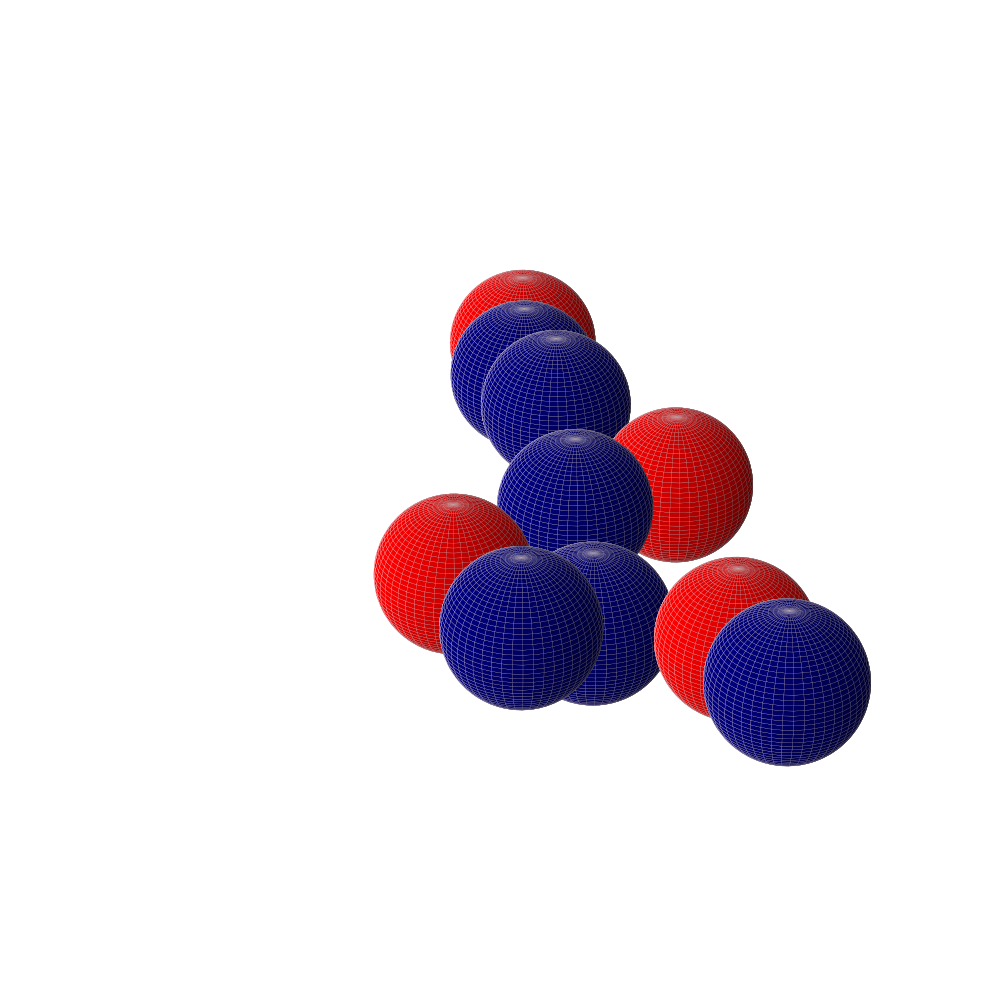

In [45]:
%matplotlib notebook

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(10, 10))#

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


# draw_ball_3D(x0, y0, radius=50, base_color='navy')
rad = 2

p1 = 38
p2 = 40

c1 = 'navy'
c2 = 'red'

draw_ball_3D(np.array([x0.iloc[p1]-10, x0.iloc[p2]]), np.array([y0.iloc[p1], y0.iloc[p2]]), radius=rad, base_color=c1)# base_color='navy') #
draw_ball_3D(np.array([x1.iloc[p1]-10, x1.iloc[p2]]), np.array([y1.iloc[p1], y1.iloc[p2]]), radius=rad, base_color=c2)# base_color='red') #
draw_ball_3D(np.array([x2.iloc[p1]-10, x2.iloc[p2]]), np.array([y2.iloc[p1], y2.iloc[p2]]), radius=rad, base_color=c1)# base_color='darkgreen') #
draw_ball_3D(np.array([x3.iloc[p1]-10, x3.iloc[p2]]), np.array([y3.iloc[p1], y3.iloc[p2]]), radius=rad, base_color=c2)# base_color='violet') #
draw_ball_3D(np.array([x4.iloc[p1]-10, x4.iloc[p2]]), np.array([y4.iloc[p1], y4.iloc[p2]]), radius=rad, base_color=c1)# base_color='blue') #
# draw_ball_3D(np.array([x5.iloc[p1]-10, x5.iloc[p2]]), np.array([y5.iloc[p1], y5.iloc[p2]]), radius=rad, color='orange')
# draw_ball_3D(np.array([x6.iloc[p1], x6.iloc[p2]]), np.array([y6.iloc[p1], y6.iloc[p2]]), radius=rad, color='lightgreen')

# draw_ball_3D(np.array([x0.iloc[p1]-10, x0.iloc[p2]]), np.array([y0.iloc[p1], y0.iloc[p2]]), radius=rad, base_color='navy') #
# draw_ball_3D(np.array([x1.iloc[p1]-10, x1.iloc[p2]]), np.array([y1.iloc[p1], y1.iloc[p2]]), radius=rad, base_color='red') #
# draw_ball_3D(np.array([x2.iloc[p1]-10, x2.iloc[p2]]), np.array([y2.iloc[p1], y2.iloc[p2]]), radius=rad, base_color='darkgreen') #
# draw_ball_3D(np.array([x3.iloc[p1]-10, x3.iloc[p2]]), np.array([y3.iloc[p1], y3.iloc[p2]]), radius=rad, base_color='violet') #
# draw_ball_3D(np.array([x4.iloc[p1]-10, x4.iloc[p2]]), np.array([y4.iloc[p1], y4.iloc[p2]]), radius=rad, base_color='blue') #

# print(xs0)
# print(zs0)
# draw_arrow(  )

# ax.view_init(90, -90) 

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_axis_off()

plt.show()

In [46]:
# plt.savefig('../results/T34to18/balls_moving.png')